In [ ]:
Tempo de execução para fastestRoute no arquivo city_graph_10x10.json: 0.00074552 segundos.
Tempo de execução para fastestRoute no arquivo city_graph_20x20.json: 0.00332999 segundos.
Tempo de execução para fastestRoute no arquivo city_graph_30x30.json: 0.00591981 segundos.

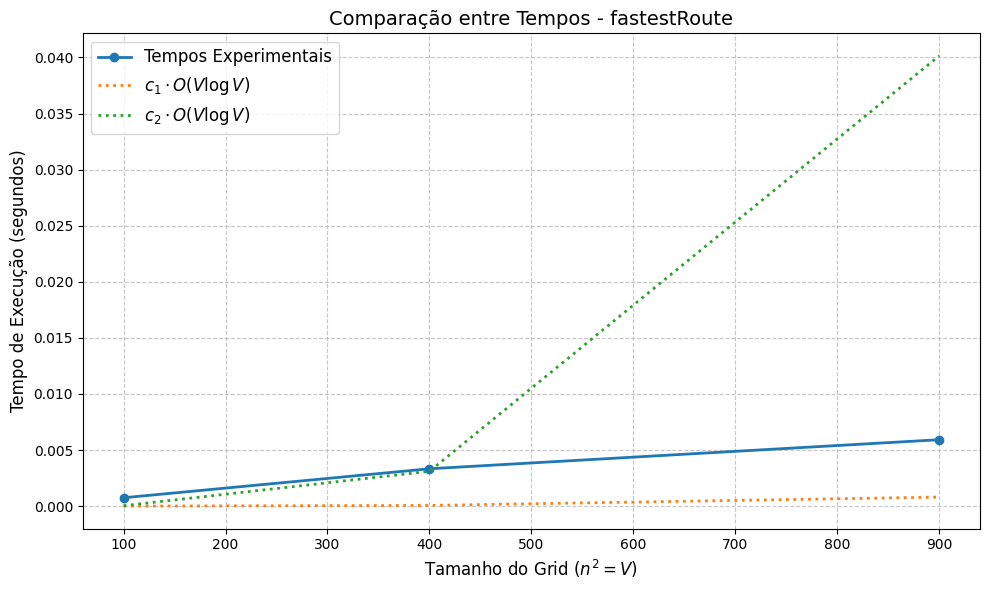

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Dados experimentais da função fastestRoute
execution_times_data = {
    "10x10": 0.00074552,
    "20x20": 0.00332999,
    "30x30": 0.00591981
}

# Extração de valores de n e tempos
sizes = [int(size.split('x')[0])**2 for size in execution_times_data.keys()]  # V = n^2
times = list(execution_times_data.values())

# Cálculo teórico: O(V^(3/2) log V), onde V = n^2
theoretical_growth = [(n**3) * np.log2(n**2) for n in sizes]

# Normalizando a função teórica para comparar com os tempos experimentais
scale_factor = times[0] / theoretical_growth[0]  # Normaliza pelo primeiro ponto experimental
scaled_theoretical_growth = [scale_factor * value for value in theoretical_growth]

# Definindo constantes c1 e c2 para os limites superior e inferior
c1, c2 = 0.001, 0.05  # Ajuste conforme necessário para verificar os limites

# Calculando limites inferior e superior
lower_bound = [c1 * value for value in scaled_theoretical_growth]
upper_bound = [c2 * value for value in scaled_theoretical_growth]

# Plotando os dados experimentais, teóricos e os limites
plt.figure(figsize=(10, 6))
plt.plot(sizes, times, marker='o', linestyle='-', label='Tempos Experimentais', linewidth=2)
# plt.plot(sizes, scaled_theoretical_growth, marker='x', linestyle='--', label=r'$O(V \log V)$ (Normalizado)', linewidth=2)
plt.plot(sizes, lower_bound, linestyle=':', label=r'$c_1 \cdot O(V \log V)$', linewidth=2)
plt.plot(sizes, upper_bound, linestyle=':', label=r'$c_2 \cdot O(V \log V)$', linewidth=2)
plt.title('Comparação entre Tempos - fastestRoute', fontsize=14)
plt.xlabel('Tamanho do Grid $(n^2 = V)$', fontsize=12)
plt.ylabel('Tempo de Execução (segundos)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()
